In [1]:
from experiment.scenario import *
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Reconstruction Optimization of Experiment with Random Error

In [2]:
from experiment_setup.exp_random_error import *

## Load optimization results

Set up or load the experiment:

In [ ]:
e.setup()
len(e)

In [3]:
e = Experiment.load(Path(experiment_dirpath, experiment_name))
len(e)

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...


25

Choose a scenario, setup optimization experiment (or load?), and load its scenarios:

In [4]:
# sc = e[10]
sc = e[14]

In [5]:
sc.setup_reconstruction_optimization()

Setting up reconstruction optimization ...


In [6]:
sc.recon_optim.optim_experiment.load_scenarios()
len(sc.recon_optim.optim_experiment)

100

Prepare the Evaluators if the summary stats should be newly computed:

sc.recon_optim.optim_experiment.run_step(Scenario.setup_evaluation, lods=["2.2"])

## Run optimization

In [4]:
e.setup()
len(e)

25

In [ ]:
e.save()

In [ ]:
e = Experiment.load(Path(experiment_dirpath, experiment_name))
len(e)

In [5]:
# sc = e[10]
sc = e[14]

In [6]:
sc.setup_reconstruction_optimization()

Setting up reconstruction optimization ...


In [ ]:
sc.prepare_reconstruction_optimization()

After an interruption, load the optimizer state from the optimization log file:

In [ ]:
log_fp = r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_010\optimization_240829-131835.log"
sc.recon_optim.load_optimizer_state([log_fp])
sc.recon_optim.past_target_values.__len__()  # number of actual target values, excluding zero-buildings cases

In [ ]:
sc.run_reconstruction_optimization(init_points=20, n_iter=80)

To execute more Evaluators, set up all evaluators for the required LOD:

In [ ]:
sc.recon_optim.optim_experiment.run_step(Scenario.setup_evaluation, lods=["2.2"])

In [ ]:
# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection="complexity")
# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection=["height", "area_volume_diff"])
sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection=["complexity", "height", "area_volume_diff", "geoflow_output"])

In [ ]:
# sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff"])
sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

## (Experimental) Load a different optimization experiment for evaluation

In [2]:
e_opt = Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_010")

Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [3]:
e_opt.name, e_opt.dirpath

('scenario_010',
 WindowsPath('C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_random_error_5x5/06_reconstruction_optimization/scenario_010'))

In [11]:
e_opt.rename("scenario_010_iou_wide_ranges")

Renaming experiment from `scenario_10_iou_wide_ranges` to `scenario_010_iou_wide_ranges` ...
Saving experiment configuration ...
Saving scenario configurations ...


In [12]:
e_opt.default_config

{'scenario_name': '',
 'crs': 'epsg:7415',
 'settings_dirpath': 'C:\\Users\\Florian\\Data\\city-to-scan-to-city\\Experiments\\experiment_test_case_random_error_5x5\\06_reconstruction_optimization\\scenario_010_iou_wide_ranges\\02_settings',
 'scene_config': {'scene_xml_filepath': 'C:\\Users\\Florian\\Data\\city-to-scan-to-city\\Experiments\\experiment_test_case_random_error_5x5\\03_scene\\experiment_test_case_random_error_5x5_scene.xml',
  'scene_xml_id': 'experiment_test_case_random_error_5x5_scene',
  'scene_name': 'experiment_test_case_random_error_5x5_scene',
  'scene_parts': [{'type': 'obj',
    'filepath': 'C:\\Users\\Florian\\Data\\city-to-scan-to-city\\Experiments\\experiment_test_case_random_error_5x5\\01_input\\9-276-556-LoD22-3D_subset.obj',
    'up_axis': 'z'},
   {'type': 'tif',
    'filepath': 'C:\\Users\\Florian\\Data\\city-to-scan-to-city\\Experiments\\experiment_test_case_random_error_5x5\\01_input\\M5_37EN1_5_m_filled_clip_to_subset.TIF',
    'material_filepath': 'C:\

In [13]:
e_opt.run_step(Scenario.setup_evaluation, lods=["2.2"])

Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.039999.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.040007.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.037507.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.041000.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.038529.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.037000.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.039018.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.048636.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after 

In [14]:
e_opt.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

Computing summary statistics from all scenarios ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.057008.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.039025.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.038797.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.037996.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.035941.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.045938.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.036829.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.043572.

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.041000.

Starting Ge

In [15]:
# Take summary statistics from loaded experiment
s = e_opt.summary_stats
s

,pulse_freq_hz,point_spacing_along,point_spacing_across,std_horizontal_error,std_vertical_error,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,thres_alpha,...,volume_22_norm_rms_abs_diff,gpkg_total_22,gpkg_unique_22,gpkg_multiple_22,cj_buildings,cj_building_parts,cj_buildings_with_bp,cj_buildings_zero_bp,cj_buildings_one_bp,cj_buildings_multiple_bp
name,,,,,,,,,,,,,,,,,,,,,
optim_0000,125000,0.277794,0.092598,0.0,0.0,1.100671,62,24,0.75,0.164435,...,0.027196,89,89,0,90,89,89,1,89,0
optim_0001,125000,0.277794,0.092598,0.0,0.0,0.040671,97,85,0.75,0.220216,...,0.029399,77,77,0,90,77,77,13,77,0
optim_0002,125000,0.277794,0.092598,0.0,0.0,0.653598,33,65,0.75,0.148099,...,0.033046,89,89,0,90,89,89,1,89,0
optim_0003,125000,0.277794,0.092598,0.0,0.0,0.307514,54,63,0.75,0.055986,...,0.027988,89,89,0,90,89,89,1,89,0
optim_0004,125000,0.277794,0.092598,0.0,0.0,1.448792,82,37,0.75,0.106695,...,0.030185,89,89,0,90,89,89,1,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
optim_0095,125000,0.277794,0.092598,0.0,0.0,1.500000,20,74,0.75,1.000000,...,0.062911,89,89,0,90,89,89,1,89,0
optim_0096,125000,0.277794,0.092598,0.0,0.0,0.010000,18,62,0.75,1.000000,...,0.041987,89,89,0,90,89,89,1,89,0
optim_0097,125000,0.277794,0.092598,0.0,0.0,1.500000,31,75,0.75,1.000000,...,0.034903,89,89,0,90,89,89,1,89,0


## Evaluation

In [7]:
# Take summary statistics from last executed optimization experiment
s = sc.recon_optim.optim_experiment.summary_stats
s

Loading summary statistics from file ...


,name,pulse_freq_hz,point_spacing_along,point_spacing_across,std_horizontal_error,std_vertical_error,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,...,volume_22_norm_rms_abs_diff,gpkg_total_22,gpkg_unique_22,gpkg_multiple_22,cj_buildings,cj_building_parts,cj_buildings_with_bp,cj_buildings_zero_bp,cj_buildings_one_bp,cj_buildings_multiple_bp
0,optim_0000,125000,0.277794,0.092598,1.0,0.3,1.490788,22,22,0.75,...,0.070249,87,87,0,90,87,87,3,87,0
1,optim_0001,125000,0.277794,0.092598,1.0,0.3,1.445338,10,10,0.75,...,0.080354,86,86,0,90,86,86,4,86,0
2,optim_0002,125000,0.277794,0.092598,1.0,0.3,0.678060,20,20,0.75,...,0.092780,87,87,0,90,87,87,3,87,0
3,optim_0003,125000,0.277794,0.092598,1.0,0.3,0.796088,19,19,0.75,...,0.104034,87,87,0,90,87,87,3,87,0
4,optim_0004,125000,0.277794,0.092598,1.0,0.3,1.254335,13,13,0.75,...,0.031530,83,83,0,90,83,83,7,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,optim_0095,125000,0.277794,0.092598,1.0,0.3,1.610596,20,20,0.75,...,0.078210,84,84,0,90,84,84,6,84,0
96,optim_0096,125000,0.277794,0.092598,1.0,0.3,1.012304,13,13,0.75,...,0.055260,88,88,0,90,88,88,2,88,0
97,optim_0097,125000,0.277794,0.092598,1.0,0.3,0.676104,14,14,0.75,...,0.062277,87,86,1,90,87,86,4,85,1
98,optim_0098,125000,0.277794,0.092598,1.0,0.3,1.000053,12,12,0.75,...,0.065710,87,87,0,90,87,87,3,87,0


In [ ]:
list(s.columns)

Results for the best values of IOU, Hausdorff, RMS minimum distance.

In [16]:
columns = []
columns.extend(list(glb.geoflow_parameters_default.keys()))
columns.extend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
columns.extend(["n_faces_22_mean", "n_faces_22_std"])
columns.extend(["area_22_mean_abs_diff"])

s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,thres_alpha,r_line_epsilon,thres_reg_line_dist,thres_reg_line_ext,r_optimisation_data_term,r_normal_k,iou_22_mean,hausdorff_22_rms,rms_min_dist_22_mean,n_faces_22_mean,n_faces_22_std,area_22_mean_abs_diff
name,,,,,,,,,,,,,,,,
optim_0005,0.061239,91,33,0.75,0.665897,0.252856,0.630305,2.648333,50.022514,5,0.980993,0.723355,0.054435,188.224719,143.059250,2.533743
optim_0020,0.081884,91,33,0.75,0.686484,0.273443,0.650892,2.669037,50.043101,5,0.980940,0.712845,0.054770,187.382022,143.708473,2.470647


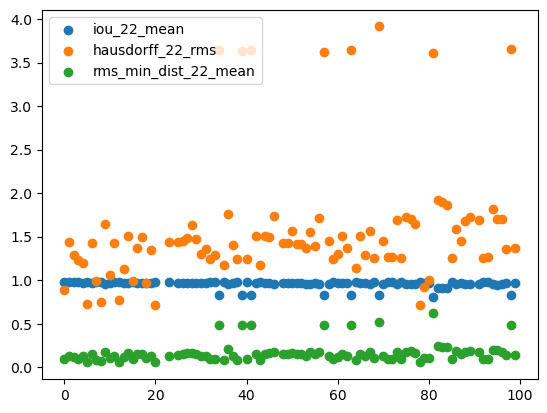

In [17]:
plt.scatter(range(100), s["iou_22_mean"])
plt.scatter(range(100), s["hausdorff_22_rms"])
plt.scatter(range(100), s["rms_min_dist_22_mean"])
plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

### Optimized metrics' influence on target metrics

Check influence on:
- iou_22_mean
- hausdorff_22_rms
- rms_min_dist_22_mean
- n_faces_22_mean

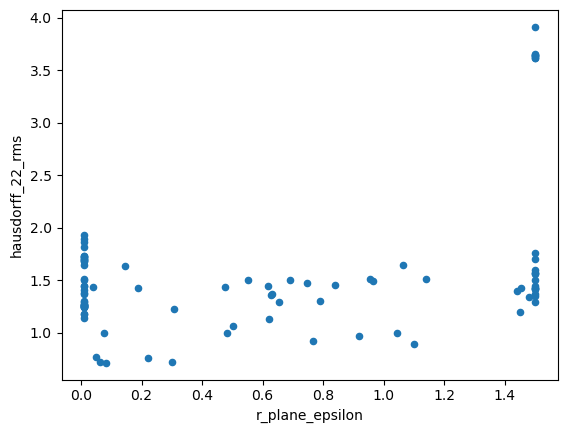

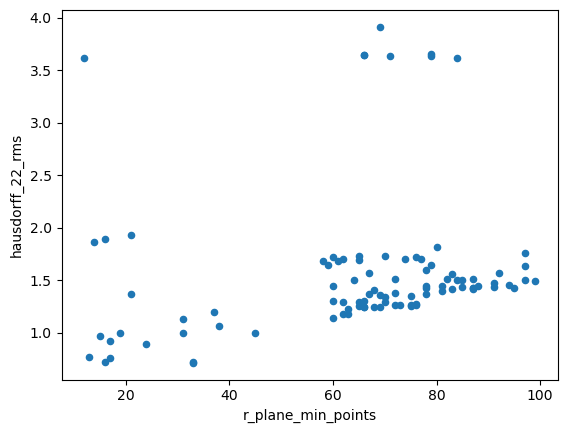

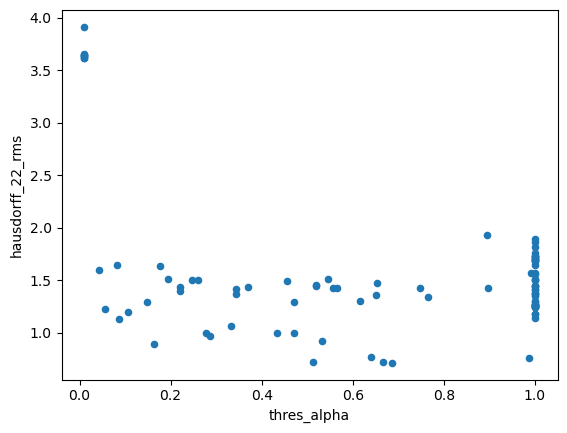

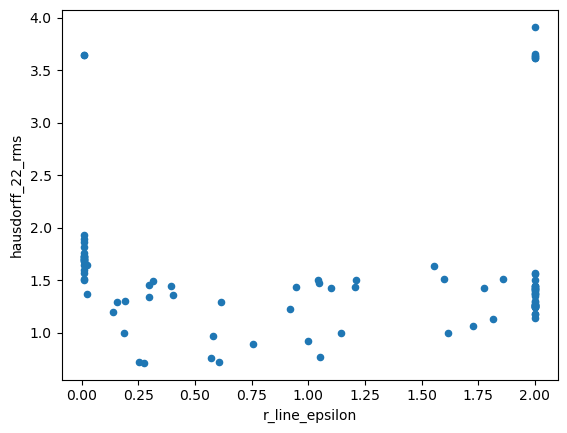

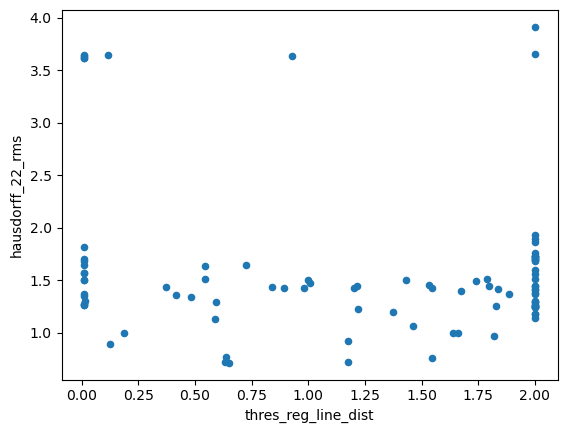

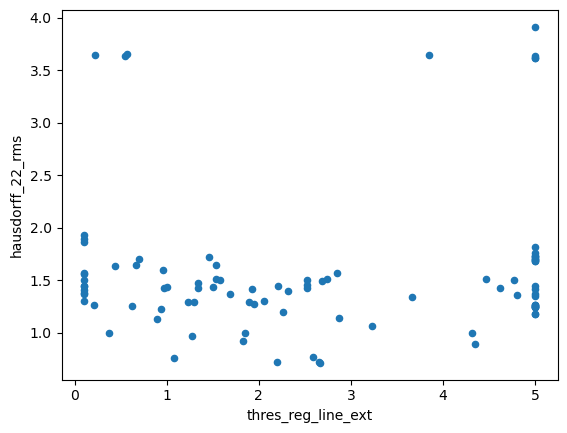

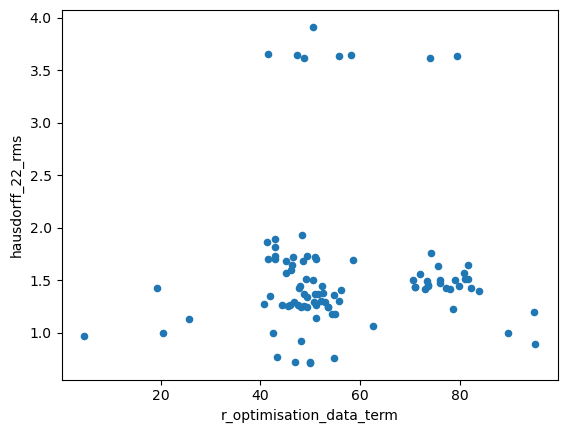

In [19]:
for opt_metric in glb.geoflow_optim_parameter_space.keys():
    opt_metric = opt_metric.split("_", 1)[1]
    s.plot.scatter(opt_metric, "hausdorff_22_rms")
plt.show()

### Target metrics correlation 

In [ ]:
ax = s.plot.scatter("iou_22_mean", "hausdorff_22_rms")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.67, 0.77)
ax = s.plot.scatter("hausdorff_22_rms", "iou_22_mean")

In [ ]:
s.plot.scatter("iou_22_mean", "rms_min_dist_22_mean")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.05, 0.06)
s.plot.scatter("rms_min_dist_22_mean", "iou_22_mean")

In [ ]:
s.plot.scatter("hausdorff_22_rms", "rms_min_dist_22_mean")
s.plot.scatter("rms_min_dist_22_mean", "hausdorff_22_rms")

### Target metrics vs. complexity

In [ ]:
s.plot.scatter("n_faces_22_mean", "iou_22_mean")
s.plot.scatter("n_faces_22_mean", "hausdorff_22_rms")
plt.ylim(1, 2)
s.plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")
plt.ylim(.2, .4)

In [ ]:
### Derived metrics vs. complexity

In [ ]:
s.plot.scatter("n_faces_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "h_70p_mean_abs_diff")

In [ ]:
### Volume diff vs. target metrics

In [ ]:
s.plot.scatter("iou_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "volume_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "volume_22_mean_abs_diff")

In [ ]:
### Area diff vs. target metrics

In [ ]:
s.plot.scatter("iou_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "area_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "area_22_mean_abs_diff")

In [ ]:
### Height diff vs. target metrics

s.plot.scatter("iou_22_mean", "h_70p_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "h_70p_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "h_70p_mean_abs_diff")